In [1]:
import re
import datetime
import pathlib
import polars as pl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
VERSION = datetime.datetime.now().strftime("%y%m%d")
print(f"Execute Date: {VERSION}")

Execute Date: 250902


## Parameters for papermill

In [3]:
foldseek_result_tsv = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_os_random_9606.tsv")
query_uniprot_idmapping_tsv = pathlib.Path("../test/oryza_sativa_test_202509/rice_random_gene_idmapping_all.tsv")
water_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_water")
needle_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_needle")
query_gene_list_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/oryza_sativa_random_gene_list.tsv")
togoid_convert_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_hit_species_togoid_convert.tsv")

In [10]:
foldseek_result_df = pl.read_csv(
    foldseek_result_tsv,
    separator='\t'
).with_columns(
    (pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession")), # "?" means non-greedy
    (pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit"))
)

foldseek_result = pl.read_csv(
    query_uniprot_idmapping_tsv, # query idmapping
    separator='\t'
).join(
    foldseek_result_df,
    on="UniProt Accession",
    how="inner",
    coalesce=True
)

display(foldseek_result)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str
"""Os01g0859200""","""Q94DD0""","""Q8IUS5""",9.3810e-12,1.0,26,19.1,0.191,73,5,347,347,32,362,362,382,0.988,0.914,0.4828,0.554,0.5339,0.5339,9.701,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SKLVLITAVALLGWAYKVA-RPPP---PPI…","""ASIHLLKLLWSLGKGPAQTFRRPAREHPP-…",219,"""0.692,0.714,0.733,0.750,0.765,…"
"""Os01g0859200""","""Q94DD0""","""Q99685""",2.3260e-11,1.0,21,17.7,0.177,56,41,337,347,19,285,303,315,0.856,0.881,0.4541,0.5321,0.5973,0.5973,5.605,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SPRVQLKDGRHLAYREA-GVGREIAKYKII…","""LPHLVNADGQYLFCRYWKPTG--TPKALIF…",193,"""0.378,0.590,0.640,0.688,0.628,…"
"""Os01g0859200""","""Q94DD0""","""Q8TB40""",2.7890e-11,1.0,18,14.6,0.146,48,40,337,347,44,335,342,328,0.859,0.854,0.4654,0.5333,0.5402,0.5402,7.691,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SSPRVQLKDGRHLAYREAGVGREIAK-YKI…","""LARYVSLPNQNKIWTVT--VSPEQNDRTPL…",214,"""0.167,0.320,0.679,0.700,0.797,…"
"""Os01g0859200""","""Q94DD0""","""Q9H6B9""",6.9150e-11,1.0,22,17.3,0.173,57,39,341,347,73,357,360,329,0.873,0.792,0.4855,0.541,0.5233,0.5233,7.893,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""VSSPRVQLK-DGRHLAYREAGVGREIAKYK…","""GEHGFLNLKSSGLRLHYVSAG--RGNG-PL…",202,"""0.142,0.236,0.395,0.641,0.725,…"
"""Os01g0859200""","""Q94DD0""","""Q86WA6""",1.3460e-10,1.0,22,17.7,0.177,59,33,339,347,30,290,291,332,0.885,0.897,0.4727,0.4683,0.5459,0.5459,9.807,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""GPG---GPPVSSPRVQLKDGRHLAYREAGV…","""GPAAAFGTSVTSAKVAVN-GVQLHYQQTGE…",177,"""0.087,0.143,0.118,0.094,0.125,…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os04g0391500""","""Q7XVN5""","""Q8NDT2""",0.007744,0.301,24,12.7,0.127,61,120,470,470,130,544,890,478,0.747,0.466,0.3547,0.1478,0.09118,0.09118,30.38,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""TVGIVPAEEYTVIELTGTDRP-----GLLS…","""GSSAAAPEYKTL--LISSLSPALPAEHLED…",227,"""0.071,0.139,0.169,0.269,0.283,…"
"""Os04g0391500""","""Q7XVN5""","""P31943""",0.00914,0.254,30,11.1,0.111,54,120,470,470,2,412,449,486,0.747,0.915,0.3245,0.1472,0.1527,0.1527,25.98,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""TVGIVPAEEYTVIELTGTDRPGLLS-EVCA…","""MLGTEGGEGFVV--KVRGLPWSCSADEVQR…",222,"""0.071,0.118,0.169,0.260,0.233,…"
"""Os04g0391500""","""Q7XVN5""","""O95758""",0.001841,0.254,32,10.8,0.108,63,1,424,470,32,549,552,580,0.902,0.938,0.281,0.1303,0.1134,0.1134,32.2,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MALTAAAASGGDAHDDEYAKLVRGMNPPRV…","""MNSSTPSTANGN-------------DSKKF…",299,"""0.812,0.800,0.833,0.750,0.611,…"


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (Strucutural alignment identity vs LDDT)

- Identity in the results of the structural alignment is also output in the foldseek output.
- However, in this notebook, you can also select the results of the pairwise alignment of amino acid sequences (global alignment, local alignment).

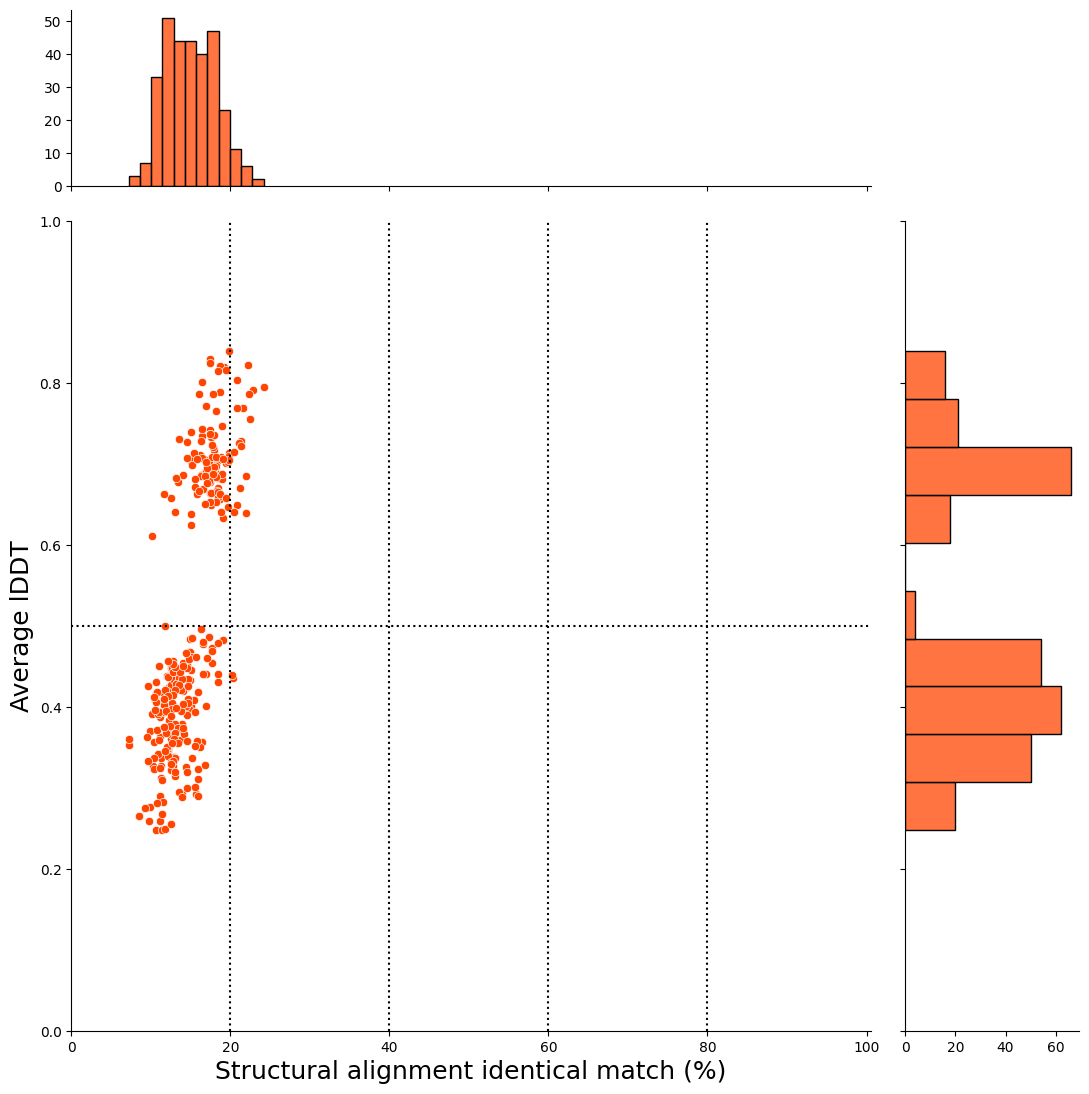

In [11]:
foldseek_filter_viz = foldseek_result.to_pandas()
sns.jointplot(
    data=foldseek_filter_viz,
    x="pident", # structural alignment identical match from foldseek result
    y="lddt",
    color="orangered",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Structural alignment identical match (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Parse pairwise alignment result (water and needle)

In [12]:
def parse_needle_water_result(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.readlines()
        
    result = {
        "UniProt Accession": None,
        "foldseek hit": None,
        "Length": None,
        "Identity": None,
        "Identity_percent": None,
        "Similarity": None,
        "Similarity_percent": None,
        "Gaps": None,
        "Gaps_percent": None,
        "Score": None
    }
    
    for line in data:
        if line.startswith('# 1:'):
            result['UniProt Accession'] = line.split(':')[1].strip()
        elif line.startswith('# 2:'):
            result['foldseek hit'] = line.split(':')[1].strip()
        elif line.startswith('# Length:'):
            result['Length'] = int(line.split()[2])
        elif line.startswith('# Identity:'):
            result['Identity'] = line.split()[2]
            result['Identity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Similarity:'):
            result['Similarity'] = line.split()[2]
            result['Similarity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Gaps:'):
            result['Gaps'] = line.split()[2]
            result['Gaps_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Score:'):
            result['Score'] = float(line.split()[2])
            
    return result

In [13]:
water_result_dir = pathlib.Path(water_result_dir_path)
needle_result_dir = pathlib.Path(needle_result_dir_path)

# Initialize empty lists to store DataFrames
water_dfs = []
needle_dfs = []

# Collect all water results
for result_file in water_result_dir.glob("*_align.water"):
    parsed_data = parse_needle_water_result(result_file)
    water_dfs.append(pl.DataFrame([parsed_data]))

# Collect all needle results    
for result_file in needle_result_dir.glob("*_align.needle"):
    parsed_data = parse_needle_water_result(result_file)
    needle_dfs.append(pl.DataFrame([parsed_data]))

# Combine all results and sort only if there are results
water_result = (pl.concat(water_dfs, how='vertical')
                .sort(["UniProt Accession", "foldseek hit"]) 
                if water_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

needle_result = (pl.concat(needle_dfs, how='vertical')
                 .sort(["UniProt Accession", "foldseek hit"])
                 if needle_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

display(water_result)
display(needle_result)

UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0P0UZ77""","""P82664""",40,"""13/40""",32.5,"""19/40""",47.5,"""3/40""",7.5,28.5
"""A0A0P0VAM0""","""O75608""",135,"""31/135""",23.0,"""53/135""",39.3,"""32/135""",23.7,69.0
"""A0A0P0VAM0""","""O95372""",162,"""39/162""",24.1,"""63/162""",38.9,"""52/162""",32.1,91.5
"""A0A0P0VAM0""","""O95870""",67,"""17/67""",25.4,"""32/67""",47.8,"""4/67""",6.0,51.0
"""A0A0P0VAM0""","""P07098""",420,"""86/420""",20.5,"""139/420""",33.1,"""155/420""",36.9,67.5
…,…,…,…,…,…,…,…,…,…
"""Q94DD0""","""Q9ULP0""",138,"""30/138""",21.7,"""52/138""",37.7,"""39/138""",28.3,53.5
"""Q94DD0""","""Q9UMR5""",258,"""46/258""",17.8,"""81/258""",31.4,"""106/258""",41.1,38.5
"""Q94DD0""","""Q9UN36""",178,"""39/178""",21.9,"""65/178""",36.5,"""54/178""",30.3,65.0


UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0P0UZ77""","""P82664""",418,"""7/418""",1.7,"""8/418""",1.9,"""399/418""",95.5,7.5
"""A0A0P0VAM0""","""O75608""",380,"""57/380""",15.0,"""96/380""",25.3,"""183/380""",48.2,50.0
"""A0A0P0VAM0""","""O95372""",388,"""64/388""",16.5,"""101/388""",26.0,"""198/388""",51.0,71.0
"""A0A0P0VAM0""","""O95870""",639,"""77/639""",12.1,"""125/639""",19.6,"""373/639""",58.4,19.5
"""A0A0P0VAM0""","""P07098""",460,"""92/460""",20.0,"""150/460""",32.6,"""175/460""",38.0,65.0
…,…,…,…,…,…,…,…,…,…
"""Q94DD0""","""Q9ULP0""",668,"""10/668""",1.5,"""12/668""",1.8,"""637/668""",95.4,18.0
"""Q94DD0""","""Q9UMR5""",425,"""60/425""",14.1,"""109/425""",25.6,"""201/425""",47.3,21.5
"""Q94DD0""","""Q9UN36""",560,"""45/560""",8.0,"""79/560""",14.1,"""402/560""",71.8,38.5


In [14]:
alignment_result = water_result.join(
    needle_result,
    on=["UniProt Accession", "foldseek hit"],
    how="inner",
    coalesce=True,
    suffix="_needle"
).rename(
    {
        "Length": "Length_water",
        "Identity": "Identity_water",
        "Identity_percent": "Identity_percent_water",
        "Similarity": "Similarity_water",
        "Similarity_percent": "Similarity_percent_water",
        "Gaps": "Gaps_water",
        "Gaps_percent": "Gaps_percent_water",
        "Score": "Score_water"
    }
).select(
    [
        "UniProt Accession",
        "foldseek hit",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_needle",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_needle",
        "Gaps_percent_water",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
)

display(alignment_result)

UniProt Accession,foldseek hit,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""A0A0P0UZ77""","""P82664""",40,418,"""13/40""","""7/418""",32.5,1.7,47.5,1.9,"""3/40""","""399/418""",7.5,95.5,28.5,7.5
"""A0A0P0VAM0""","""O75608""",135,380,"""31/135""","""57/380""",23.0,15.0,39.3,25.3,"""32/135""","""183/380""",23.7,48.2,69.0,50.0
"""A0A0P0VAM0""","""O95372""",162,388,"""39/162""","""64/388""",24.1,16.5,38.9,26.0,"""52/162""","""198/388""",32.1,51.0,91.5,71.0
"""A0A0P0VAM0""","""O95870""",67,639,"""17/67""","""77/639""",25.4,12.1,47.8,19.6,"""4/67""","""373/639""",6.0,58.4,51.0,19.5
"""A0A0P0VAM0""","""P07098""",420,460,"""86/420""","""92/460""",20.5,20.0,33.1,32.6,"""155/420""","""175/460""",36.9,38.0,67.5,65.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Q94DD0""","""Q9ULP0""",138,668,"""30/138""","""10/668""",21.7,1.5,37.7,1.8,"""39/138""","""637/668""",28.3,95.4,53.5,18.0
"""Q94DD0""","""Q9UMR5""",258,425,"""46/258""","""60/425""",17.8,14.1,31.4,25.6,"""106/258""","""201/425""",41.1,47.3,38.5,21.5
"""Q94DD0""","""Q9UN36""",178,560,"""39/178""","""45/560""",21.9,8.0,36.5,14.1,"""54/178""","""402/560""",30.3,71.8,65.0,38.5


&nbsp;


&nbsp;

## Integrate foldseek result and pairwise alignment result

- This time, **exclude the ones that are null in pairwise alignment result, which means the current UniProt entry is obsolete**

In [15]:
join_foldseek = foldseek_result.join(
    alignment_result,
    on=["UniProt Accession", "foldseek hit"],
    how="left",
    coalesce=True
).filter( # filter out null alignment result (this means current UniProt entry is obsolete)
    pl.col("Length_water").is_not_null() & 
    pl.col("Length_needle").is_not_null()
).unique()


print(join_foldseek.group_by(["UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(join_foldseek.head())

shape: (311, 44)
┌─────────────┬────────────┬──────┬────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ UniProt     ┆ foldseek   ┆ From ┆ evalue ┆ … ┆ Gaps_perce ┆ Gaps_perce ┆ Score_wate ┆ Score_need │
│ Accession   ┆ hit        ┆ ---  ┆ ---    ┆   ┆ nt_water   ┆ nt_needle  ┆ r          ┆ le         │
│ ---         ┆ ---        ┆ u32  ┆ u32    ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str         ┆ str        ┆      ┆        ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════════╪════════════╪══════╪════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ Q94DD0      ┆ Q5VXI9     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q94DD0      ┆ Q5VYY2     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q94DD0      ┆ Q8WWY8     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q94DD0      ┆ Q5W064     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os01g0859200""","""Q94DD0""","""Q5VXI9""",2.3150e-9,1.0,23,14.9,0.149,57,38,335,347,46,391,398,382,0.859,0.869,0.433,0.5128,0.4541,0.4541,9.796,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""PVSSPRVQLKDGRHLAYREAGVGREIAK--…","""PSEEYEVTTEDGYILLVNRIPYGRTHARST…",205,"""0.110,0.153,0.243,0.355,0.596,…",360,454,"""71/360""","""81/454""",19.7,17.8,34.7,32.2,"""128/360""","""163/454""",35.6,35.9,78.5,58.5
"""Os01g0859200""","""Q94DD0""","""Q5VYY2""",6.4480e-7,1.0,28,12.9,0.129,55,5,336,347,15,405,423,424,0.957,0.924,0.4331,0.4935,0.4154,0.4154,10.86,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SKLVLITAVALLGWAYKVARPPPPPILGGP…","""MEMWLLILVAYMFQRNVNSVHMPTKAV-DP…",244,"""0.692,0.714,0.733,0.750,0.765,…",387,503,"""76/387""","""82/503""",19.6,16.3,31.8,28.0,"""155/387""","""236/503""",40.1,46.9,55.0,37.0
"""Os01g0859200""","""Q94DD0""","""Q8WWY8""",0.01321,0.855,8,15.2,0.152,26,40,175,347,24,188,451,170,0.392,0.366,0.3372,0.2488,0.2013,0.2013,6.998,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SSPRV---QLKDGRHLAYREAGVGRE----…","""SFTRLSFHSAVVGTGLNVRLMLYTRKNLTC…",105,"""0.194,0.227,0.301,0.225,0.271,…",133,762,"""31/133""","""17/762""",23.3,2.2,34.6,2.9,"""51/133""","""726/762""",38.3,95.3,43.5,22.0
"""Os01g0859200""","""Q94DD0""","""Q5W064""",2.4480e-7,1.0,23,12.0,0.12,45,39,335,347,12,359,366,374,0.856,0.951,0.4382,0.5303,0.5059,0.5059,7.875,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""VSSPRVQL--KDGRHLAYREAGVGRE----…","""YPDEEYDIVTEDGYILGLYRIPYWRTDNNK…",226,"""0.125,0.188,0.250,0.321,0.335,…",409,457,"""72/409""","""75/457""",17.6,16.4,30.8,29.5,"""165/409""","""201/457""",40.3,44.0,51.0,38.5
"""Os01g0859200""","""A0A0P0VAM0""","""Q8IUS5""",1.0420e-11,1.0,27,17.7,0.177,74,1,347,347,1,362,362,418,1.0,1.0,0.4688,0.5452,0.5257,0.5257,11.47,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MVALSKL---VLITAVALLGW--AYKVA--…","""MARLRDCLPRLMLTLRSLLFWSLVYCYCGL…",217,"""0.667,0.600,0.568,0.521,0.462,…",373,430,"""88/373""","""95/430""",23.6,22.1,36.7,34.9,"""118/373""","""151/430""",31.6,35.1,128.5,122.5


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Create Scatter Plot for all hits (x-axis: Similarity_percent_needle) Global alignment

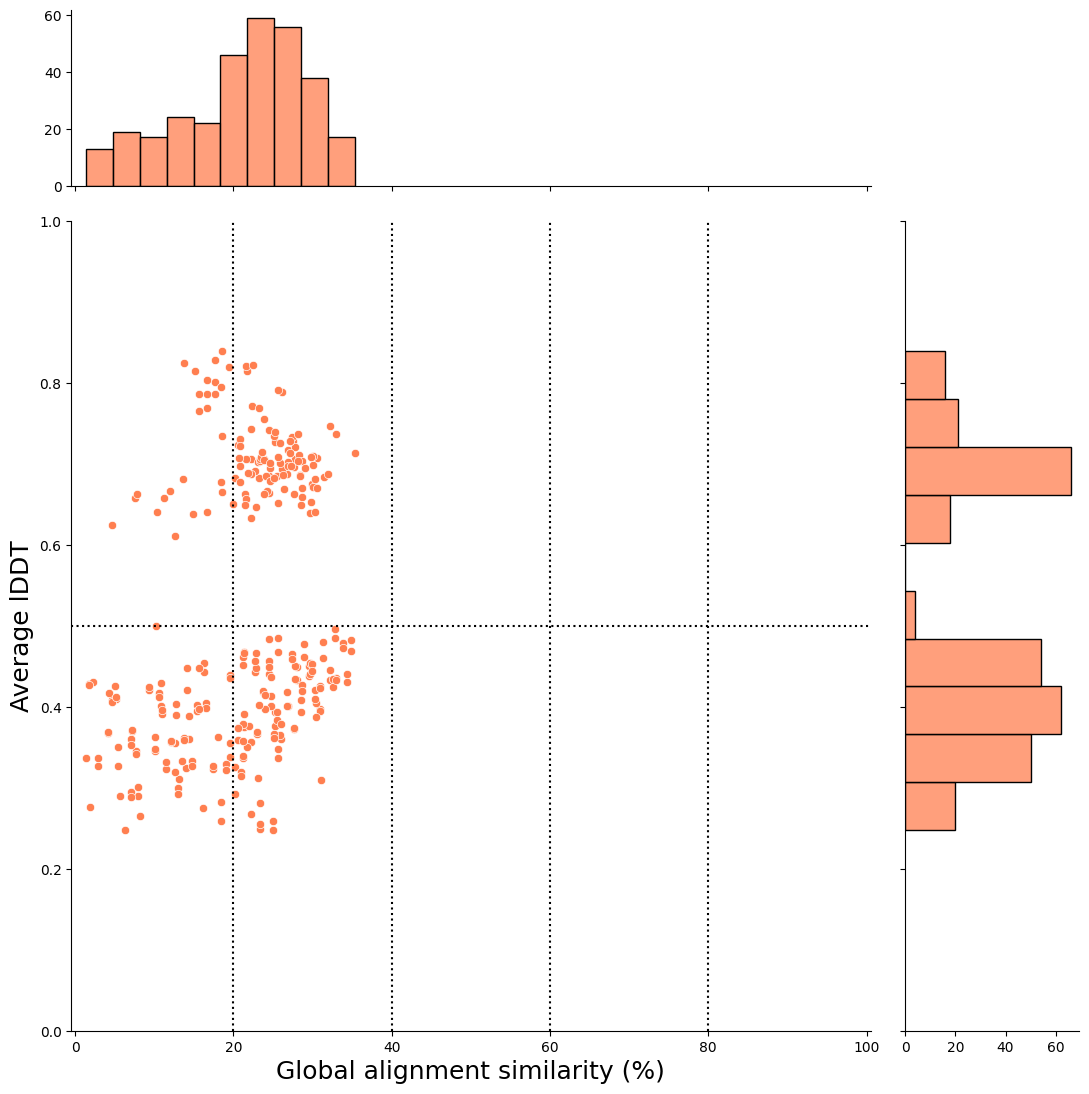

In [16]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;


## Create Scatter Plot for all hits (x-axis: Similarity_percent_water) Local Alignment

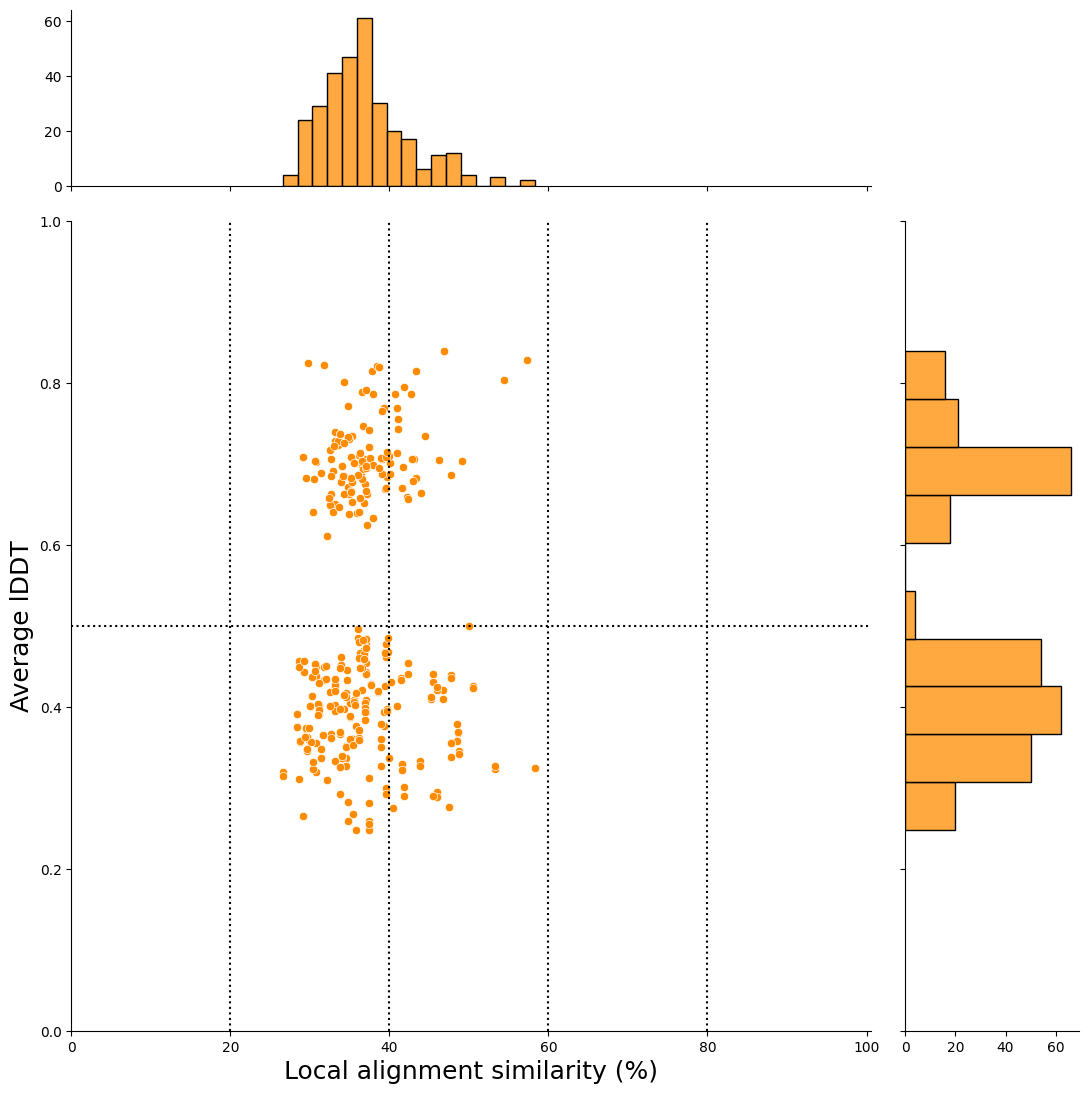

In [19]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_water", # local alignment similarity
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Counting foldseek hits in Gene level

In [24]:
all_gene_list = pl.read_csv(
    query_gene_list_tsv_path,
    separator='\t'
).select(
    "From"
).unique()

hit_count = all_gene_list.join(
    join_foldseek,
    on="From",
    how="left",
    coalesce=True
).group_by("From", maintain_order=True).agg(
    (pl.col("foldseek hit").count().alias("target hit count (gene level vs uniprot accession)")),
    (pl.col("foldseek hit").is_null().all().alias("foldseek no hit"))
).sort(
    ["target hit count (gene level vs uniprot accession)"], descending=True
)

display(hit_count)

From,target hit count (gene level vs uniprot accession),foldseek no hit
str,u32,bool
"""Os01g0859200""",168,false
"""Os06g0140700""",121,false
"""Os04g0391500""",21,false
"""Os01g0187600""",1,false
"""Os02g0609000""",0,true
"""Os12g0159500""",0,true
"""Os05g0468600""",0,true
"""Os01g0795250""",0,true
"""Os05g0352750""",0,true


&nbsp;

&nbsp;

&nbsp;

# Caution:
- The filtering steps that are executed below can be changed freely.

&nbsp;

## Filtering Condition1

- Select the ones that have foldseek hit

In [20]:
condition1 = join_foldseek.filter(
        (pl.col("qcov") >= 0.5) &
        (pl.col("tcov") >= 0.5)
    ).sort(
        by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession
        descending=[False, False, False]
    )

condition1_rm = condition1.filter(
        (pl.col("qcov") < 0.5) |
        (pl.col("tcov") < 0.5)
    )

print(condition1.group_by(["From"], maintain_order=True).n_unique())
display(condition1)

shape: (4, 44)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek  ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ Accession  ┆ hit       ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Os01g01876 ┆ 1          ┆ 1         ┆ 1      ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1         │
│ 00         ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Os01g08592 ┆ 2          ┆ 61        ┆ 107    ┆ … ┆ 59        ┆ 56        ┆

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os01g0187600""","""A0A0P0UZ77""","""P82664""",0.01979,0.15,12,9.9,0.099,20,9,187,236,38,199,201,201,0.758,0.806,0.2763,0.1732,0.1954,0.1954,24.54,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ETVTCSKAVNSDLFDAVLGGLGQFGVITRA…","""LSTNMKWVQFSNLHVDVPKDL----TKPVV…",120,"""0.152,0.167,0.157,0.154,0.171,…",40,418,"""13/40""","""7/418""",32.5,1.7,47.5,1.9,"""3/40""","""399/418""",7.5,95.5,28.5,7.5
"""Os01g0859200""","""A0A0P0VAM0""","""O75608""",0.000098,1.0,16,12.4,0.124,40,54,335,347,11,226,230,322,0.813,0.939,0.3757,0.3443,0.4903,0.4903,10.52,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""YREAGVGREIAKYKIIFSHGFASTKESDFP…","""PAIV-PAARKATAAVIFLHGLGDT----GH…",136,"""0.363,0.347,0.466,0.565,0.471,…",135,380,"""31/135""","""57/380""",23.0,15.0,39.3,25.3,"""32/135""","""183/380""",23.7,48.2,69.0,50.0
"""Os01g0859200""","""Q94DD0""","""O75608""",0.0004453,0.999,19,11.6,0.116,38,54,335,347,11,226,230,325,0.813,0.939,0.3935,0.3412,0.4852,0.4852,10.62,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""YREAGVGREIAKYKIIFSHGFASTKESDFP…","""PAIV-PAARKATAAVIFLHGL-----GDTG…",135,"""0.330,0.321,0.467,0.532,0.466,…",135,380,"""31/135""","""57/380""",23.0,15.0,39.3,25.3,"""32/135""","""183/380""",23.7,48.2,69.0,50.0
"""Os01g0859200""","""Q94DD0""","""O75884""",0.001173,1.0,13,13.5,0.135,38,64,339,347,3,182,186,281,0.795,0.968,0.3762,0.3561,0.6036,0.6036,9.098,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""AKYKIIFSHGFASTKESDFP----VSQELA…","""SPSKAVIVPGNGGGDVTTHGWYGWVKKELE…",137,"""0.125,0.284,0.534,0.588,0.533,…",123,377,"""28/123""","""49/377""",22.8,13.0,35.8,22.0,"""44/123""","""221/377""",35.8,58.6,48.0,34.0
"""Os01g0859200""","""A0A0P0VAM0""","""O95372""",0.0004253,0.997,19,12.9,0.129,39,54,322,347,14,210,231,302,0.775,0.853,0.3598,0.3265,0.4711,0.4711,10.82,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""YREAGVGREIAKYKIIFSHGFASTKESDFP…","""AATVS-GAERETAAVIFLHGLGDTGHS---…",125,"""0.414,0.370,0.470,0.569,0.452,…",162,388,"""39/162""","""64/388""",24.1,16.5,38.9,26.0,"""52/162""","""198/388""",32.1,51.0,91.5,71.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os06g0140700""","""Q5VPE3""","""Q9NYD6""",0.0009204,1.0,4,18.5,0.185,37,1,179,308,163,335,342,199,0.581,0.506,0.8142,0.2135,0.193,0.193,29.04,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MMDLGLSLGLGLASQGSLTSSTTTTSSPGA…","""HCSGANDFEAPFEQRASLNPRAEHLESPQL…",116,"""1.000,0.800,0.958,0.929,0.938,…",120,497,"""30/120""","""44/497""",25.0,8.9,43.3,15.1,"""23/120""","""344/497""",19.2,69.2,108.5,88.5
"""Os06g0140700""","""Q5VPE3""","""Q9NZR4""",0.0007067,0.941,9,17.8,0.178,60,1,307,308,73,352,365,337,0.997,0.767,0.7205,0.1776,0.1509,0.1509,36.19,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MMDLGLSLGLGLASQGSLTSSTTTTSSPGA…","""LARGALPLGLGLLCGFGTQPPAAARAPCLL…",190,"""0.812,0.900,0.875,0.929,0.938,…",208,431,"""49/208""","""73/431""",23.6,16.9,37.5,27.8,"""45/208""","""189/431""",21.6,43.9,100.5,82.0
"""Os06g0140700""","""Q5VPE3""","""Q9UD57""",0.00105,0.933,9,17.5,0.175,59,1,308,308,48,302,310,337,1.0,0.823,0.7367,0.1788,0.1777,0.1777,42.01,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MMDLGLSLGLGLASQGSLTS-STTTTSSPG…","""KSLAEVEAGKDASSRDPVRQLETPDAAGPG…",167,"""0.812,0.900,0.875,0.893,0.906,…",284,384,"""

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Filtering Condition2

- If there are hits with the same target for the same gene-derived UniProt ID, the one with the highest qcov is selected, and if the qcov is the same, the one with the highest lDDT is selected.
- **Note that in this study, we leave the states with the same foldseek hit even if the rice genes are different.**

In [22]:
condition2 = condition1.sort(
    by=["qcov", "lddt"],
    descending=[True, True]
).group_by(
    ["From", "foldseek hit"],
    maintain_order=True
).agg(
    pl.all().first()
).sort(
    by=["From", "UniProt Accession", "foldseek hit"],
    descending=[False, False, False]
).select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "evalue",
    "prob",
    "gapopen",
    "pident",
    "fident",
    "nident",
    "qstart",
    "qend",
    "qlen",
    "tstart",
    "tend",
    "tlen",
    "alnlen",
    "qcov",
    "tcov",
    "lddt",
    "qtmscore",
    "ttmscore",
    "alntmscore",
    "rmsd",
    "taxid",
    "taxname",
    "mismatch",
    "Length_water",
    "Length_needle",
    "Identity_water",
    "Identity_needle",
    "Identity_percent_water",
    "Identity_percent_needle",
    "Similarity_percent_water",
    "Similarity_percent_needle",
    "Gaps_water",
    "Gaps_percent_water",
    "Gaps_needle",
    "Gaps_percent_needle",
    "Score_water",
    "Score_needle"
)

display(condition2)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,mismatch,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,i64,i64,i64,str,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Os01g0187600""","""A0A0P0UZ77""","""P82664""",0.01979,0.15,12,9.9,0.099,20,9,187,236,38,199,201,201,0.758,0.806,0.2763,0.1732,0.1954,0.1954,24.54,9606,"""Homo sapiens""",120,40,418,"""13/40""","""7/418""",32.5,1.7,47.5,1.9,"""3/40""",7.5,"""399/418""",95.5,28.5,7.5
"""Os01g0859200""","""A0A0P0VAM0""","""O95870""",0.000098,0.991,21,13.4,0.134,47,43,322,347,254,543,558,350,0.807,0.52,0.3557,0.3232,0.2119,0.2119,18.28,9606,"""Homo sapiens""",173,67,639,"""17/67""","""77/639""",25.4,12.1,47.8,19.6,"""4/67""",6.0,"""373/639""",58.4,51.0,19.5
"""Os01g0859200""","""A0A0P0VAM0""","""P07098""",9.7090e-10,1.0,23,13.9,0.139,51,40,337,347,47,388,398,366,0.859,0.859,0.4341,0.5134,0.4581,0.4581,7.891,9606,"""Homo sapiens""",223,420,460,"""86/420""","""92/460""",20.5,20.0,33.1,32.6,"""155/420""",36.9,"""175/460""",38.0,67.5,65.0
"""Os01g0859200""","""A0A0P0VAM0""","""P07099""",0.000002,1.0,21,12.2,0.122,43,43,336,347,117,447,455,352,0.847,0.727,0.4568,0.5356,0.4248,0.4248,7.628,9606,"""Homo sapiens""",230,396,565,"""73/396""","""80/565""",18.4,14.2,29.3,22.7,"""192/396""",48.5,"""328/565""",58.1,90.5,71.5
"""Os01g0859200""","""A0A0P0VAM0""","""P10619""",0.000002,1.0,31,12.8,0.128,63,7,344,347,11,479,480,492,0.974,0.977,0.4143,0.5182,0.3906,0.3906,19.73,9606,"""Homo sapiens""",252,254,559,"""51/254""","""77/559""",20.1,13.8,34.3,24.0,"""80/254""",31.5,"""291/559""",52.1,72.0,53.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os06g0140700""","""Q5VPE3""","""Q9NYD6""",0.0009204,1.0,4,18.5,0.185,37,1,179,308,163,335,342,199,0.581,0.506,0.8142,0.2135,0.193,0.193,29.04,9606,"""Homo sapiens""",116,120,497,"""30/120""","""44/497""",25.0,8.9,43.3,15.1,"""23/120""",19.2,"""344/497""",69.2,108.5,88.5
"""Os06g0140700""","""Q5VPE3""","""Q9NZR4""",0.0007067,0.941,9,17.8,0.178,60,1,307,308,73,352,365,337,0.997,0.767,0.7205,0.1776,0.1509,0.1509,36.19,9606,"""Homo sapiens""",190,208,431,"""49/208""","""73/431""",23.6,16.9,37.5,27.8,"""45/208""",21.6,"""189/431""",43.9,100.5,82.0
"""Os06g0140700""","""Q5VPE3""","""Q9UD57""",0.00105,0.933,9,17.5,0.175,59,1,308,308,48,302,310,337,1.0,0.823,0.7367,0.1788,0.1777,0.1777,42.01,9606,"""Homo sapiens""",167,284,384,"""70/284""","""74/384""",24.6,19.3,33.8,28.1,"""83/284""",29.2,"""150/384""",39.1,133.0,111.5


&nbsp;

&nbsp;

&nbsp;

## Filtering Condition3

- Select hits that can be converted to Ensembl gene id and HGNC Gene nomenclature with TogoID API
- https://togoid.dbcls.jp/

In [25]:
togoid_convert = pl.read_csv(
    togoid_convert_tsv_path,
    separator='\t'
).rename(
    {
        "uniprot_id" : "foldseek hit"
    }
).filter(
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).sort(
    by=["foldseek hit"],
    descending=[False]
)

display(togoid_convert)

foldseek hit,ensembl_protein_id,ensembl_transcript_id,ensembl_gene_id,hgnc_id,hgnc_symbol_id
str,str,str,str,i64,str
"""A0A1W2PPF3""","""ENSP00000491301""","""ENST00000633875""","""ENSG00000282757""",33345,"""DUXB"""
"""A0A1W2PPM1""","""ENSP00000491599""","""ENST00000640559""","""ENSG00000283755""",51815,"""CPHXL"""
"""A2RU54""","""ENSP00000341108""","""ENST00000339992""","""ENSG00000188816""",5018,"""HMX2"""
"""A6NCS4""","""ENSP00000320089""","""ENST00000325017""","""ENSG00000180053""",32940,"""NKX2-6"""
"""A6NHT5""","""ENSP00000350549""","""ENST00000357878""","""ENSG00000188620""",5019,"""HMX3"""
…,…,…,…,…,…
"""Q9Y570""","""ENSP00000329867""","""ENST00000328257""","""ENSG00000214517""",30178,"""PPME1"""
"""Q9Y570""","""ENSP00000381461""","""ENST00000398427""","""ENSG00000214517""",30178,"""PPME1"""
"""Q9Y5X9""","""ENSP00000261292""","""ENST00000261292""","""ENSG00000101670""",6623,"""LIPG"""


In [26]:
condition3 = condition2.join(
    togoid_convert,
    on="foldseek hit",
    how="left",
    coalesce=True
).drop(
    [
        "ensembl_transcript_id",
        "hgnc_id"
    ]
).filter( 
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).select(
    [
        "From",
        "UniProt Accession",
        "foldseek hit",
        "ensembl_protein_id",
        "ensembl_gene_id",
        "hgnc_symbol_id",
        "evalue",
        "prob",
        "gapopen",
        "pident",
        "fident",
        "nident",
        "qstart",
        "qend",
        "qlen",
        "tstart",
        "tend",
        "tlen",
        "alnlen",
        "mismatch",
        "qcov",
        "tcov",
        "rmsd",
        "lddt",
        "qtmscore",
        "ttmscore",
        "alntmscore",
        "taxid",
        "taxname",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_percent_water",
        "Gaps_needle",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
).sort(
    by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession (change order)
    descending=[False, False, False]
)



print(condition3.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(condition3)


shape: (169, 42)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ From      ┆ UniProt   ┆ foldseek  ┆ ensembl_p ┆ … ┆ Gaps_need ┆ Gaps_perc ┆ Score_wat ┆ Score_ne │
│ ---       ┆ Accession ┆ hit       ┆ rotein_id ┆   ┆ le        ┆ ent_needl ┆ er        ┆ edle     │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆ u32       ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32      │
│           ┆           ┆           ┆           ┆   ┆           ┆ u32       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Os01g0187 ┆ A0A0P0UZ7 ┆ P82664    ┆ 1         ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1        │
│ 600       ┆ 7         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Os01g0859 ┆ Q94DD0    ┆ O75608    ┆ 2         ┆ … ┆ 1         ┆ 1       

From,UniProt Accession,foldseek hit,ensembl_protein_id,ensembl_gene_id,hgnc_symbol_id,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,mismatch,qcov,tcov,rmsd,lddt,qtmscore,ttmscore,alntmscore,taxid,taxname,Length_water,Length_needle,Identity_water,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,i64,i64,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Os01g0187600""","""A0A0P0UZ77""","""P82664""","""ENSP00000053468""","""ENSG00000048544""","""MRPS10""",0.01979,0.15,12,9.9,0.099,20,9,187,236,38,199,201,201,120,0.758,0.806,24.54,0.2763,0.1732,0.1954,0.1954,9606,"""Homo sapiens""",40,418,"""13/40""",32.5,1.7,47.5,1.9,"""3/40""",7.5,"""399/418""",95.5,28.5,7.5
"""Os01g0859200""","""Q94DD0""","""O75608""","""ENSP00000320043""","""ENSG00000120992""","""LYPLA1""",0.0004453,0.999,19,11.6,0.116,38,54,335,347,11,226,230,325,135,0.813,0.939,10.62,0.3935,0.3412,0.4852,0.4852,9606,"""Homo sapiens""",135,380,"""31/135""",23.0,15.0,39.3,25.3,"""32/135""",23.7,"""183/380""",48.2,69.0,50.0
"""Os01g0859200""","""Q94DD0""","""O75608""","""ENSP00000344477""","""ENSG00000120992""","""LYPLA1""",0.0004453,0.999,19,11.6,0.116,38,54,335,347,11,226,230,325,135,0.813,0.939,10.62,0.3935,0.3412,0.4852,0.4852,9606,"""Homo sapiens""",135,380,"""31/135""",23.0,15.0,39.3,25.3,"""32/135""",23.7,"""183/380""",48.2,69.0,50.0
"""Os01g0859200""","""Q94DD0""","""O75884""","""ENSP00000336866""","""ENSG00000089050""","""RBBP9""",0.001173,1.0,13,13.5,0.135,38,64,339,347,3,182,186,281,137,0.795,0.968,9.098,0.3762,0.3561,0.6036,0.6036,9606,"""Homo sapiens""",123,377,"""28/123""",22.8,13.0,35.8,22.0,"""44/123""",35.8,"""221/377""",58.6,48.0,34.0
"""Os01g0859200""","""Q94DD0""","""O95372""","""ENSP00000363638""","""ENSG00000011009""","""LYPLA2""",0.001246,0.997,24,13.9,0.139,47,45,340,347,10,229,231,336,133,0.853,0.952,10.53,0.3787,0.3525,0.507,0.507,9606,"""Homo sapiens""",162,388,"""39/162""",24.1,16.5,38.9,26.0,"""52/162""",32.1,"""198/388""",51.0,91.5,71.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os06g0140700""","""Q5VPE3""","""Q9NZR4""","""ENSP00000387069""","""ENSG00000100987""","""VSX1""",0.0007067,0.941,9,17.8,0.178,60,1,307,308,73,352,365,337,190,0.997,0.767,36.19,0.7205,0.1776,0.1509,0.1509,9606,"""Homo sapiens""",208,431,"""49/208""",23.6,16.9,37.5,27.8,"""45/208""",21.6,"""189/431""",43.9,100.5,82.0
"""Os06g0140700""","""Q5VPE3""","""Q9UD57""","""ENSP00000451945""","""ENSG00000229544""","""NKX1-2""",0.00105,0.933,9,17.5,0.175,59,1,308,308,48,302,310,337,167,1.0,0.823,42.01,0.7367,0.1788,0.1777,0.1777,9606,"""Homo sapiens""",284,384,"""70/284""",24.6,19.3,33.8,28.1,"""83/284""",29.2,"""150/384""",39.1,133.0,111.5
"""Os06g0140700""","""Q5VPE3""","""Q9UIW0""","""ENSP00000234392""","""ENSG00000116035""","""VAX2""",0.0001356,0.999,4,17.6,0.176,50,62,308,308,16,290,290,283,189,0.802,0.948,27.37,0.7328,0.2492,0.2632,0.2632,9606,"""Homo sapiens""",270,383,"""62/270""",23.0,18.8,34.8,27.4,"""88/270""",32.6,"""168/383""",43.9,139.5,129.0


&nbsp;

&nbsp;


In [27]:
foldseek_filter_viz = condition3.select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "qcov",
    "tcov",
    "rmsd",
    "lddt",
    "Identity_percent_needle",
    "Identity_percent_water",
    "Similarity_percent_needle",
    "Similarity_percent_water"
).unique(
    subset=["From", "UniProt Accession", "foldseek hit"]
).sort(
    by=["From"],
    descending=[False]
)

print(foldseek_filter_viz.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(foldseek_filter_viz)

shape: (169, 11)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek   ┆ qcov ┆ … ┆ Identity_p ┆ Identity_ ┆ Similarit ┆ Similarit │
│ ---        ┆ Accession  ┆ hit        ┆ ---  ┆   ┆ ercent_nee ┆ percent_w ┆ y_percent ┆ y_percent │
│ str        ┆ ---        ┆ ---        ┆ u32  ┆   ┆ dle        ┆ ater      ┆ _needle   ┆ _water    │
│            ┆ str        ┆ str        ┆      ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆      ┆   ┆ u32        ┆ u32       ┆ u32       ┆ u32       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ Os01g01876 ┆ A0A0P0UZ77 ┆ P82664     ┆ 1    ┆ … ┆ 1          ┆ 1         ┆ 1         ┆ 1         │
│ 00         ┆            ┆            ┆      ┆   ┆            ┆           ┆           ┆           │
│ Os01g08592 ┆ Q94DD0     ┆ O75884     ┆ 1    ┆ … ┆ 1          ┆ 1        

From,UniProt Accession,foldseek hit,qcov,tcov,rmsd,lddt,Identity_percent_needle,Identity_percent_water,Similarity_percent_needle,Similarity_percent_water
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""Os01g0187600""","""A0A0P0UZ77""","""P82664""",0.758,0.806,24.54,0.2763,1.7,32.5,1.9,47.5
"""Os01g0859200""","""Q94DD0""","""O75884""",0.795,0.968,9.098,0.3762,13.0,22.8,22.0,35.8
"""Os01g0859200""","""Q94DD0""","""Q6P093""",0.85,0.773,14.22,0.3449,5.2,37.2,7.7,48.8
"""Os01g0859200""","""A0A0P0VAM0""","""Q9H6B9""",0.977,0.964,10.46,0.4965,21.0,23.4,32.8,36.0
"""Os01g0859200""","""Q94DD0""","""Q5EB52""",0.957,0.967,8.791,0.4771,17.7,23.9,28.9,39.6
…,…,…,…,…,…,…,…,…,…,…
"""Os06g0140700""","""Q5VPE3""","""P78337""",0.799,0.707,36.6,0.7094,17.1,22.5,30.0,40.0
"""Os06g0140700""","""Q5VPE3""","""Q8N693""",0.997,0.692,39.63,0.7339,17.8,25.2,25.1,35.3
"""Os06g0140700""","""Q5VPE3""","""P52952""",0.942,0.951,37.9,0.7082,20.4,24.4,29.8,35.2


<Figure size 4000x4000 with 0 Axes>

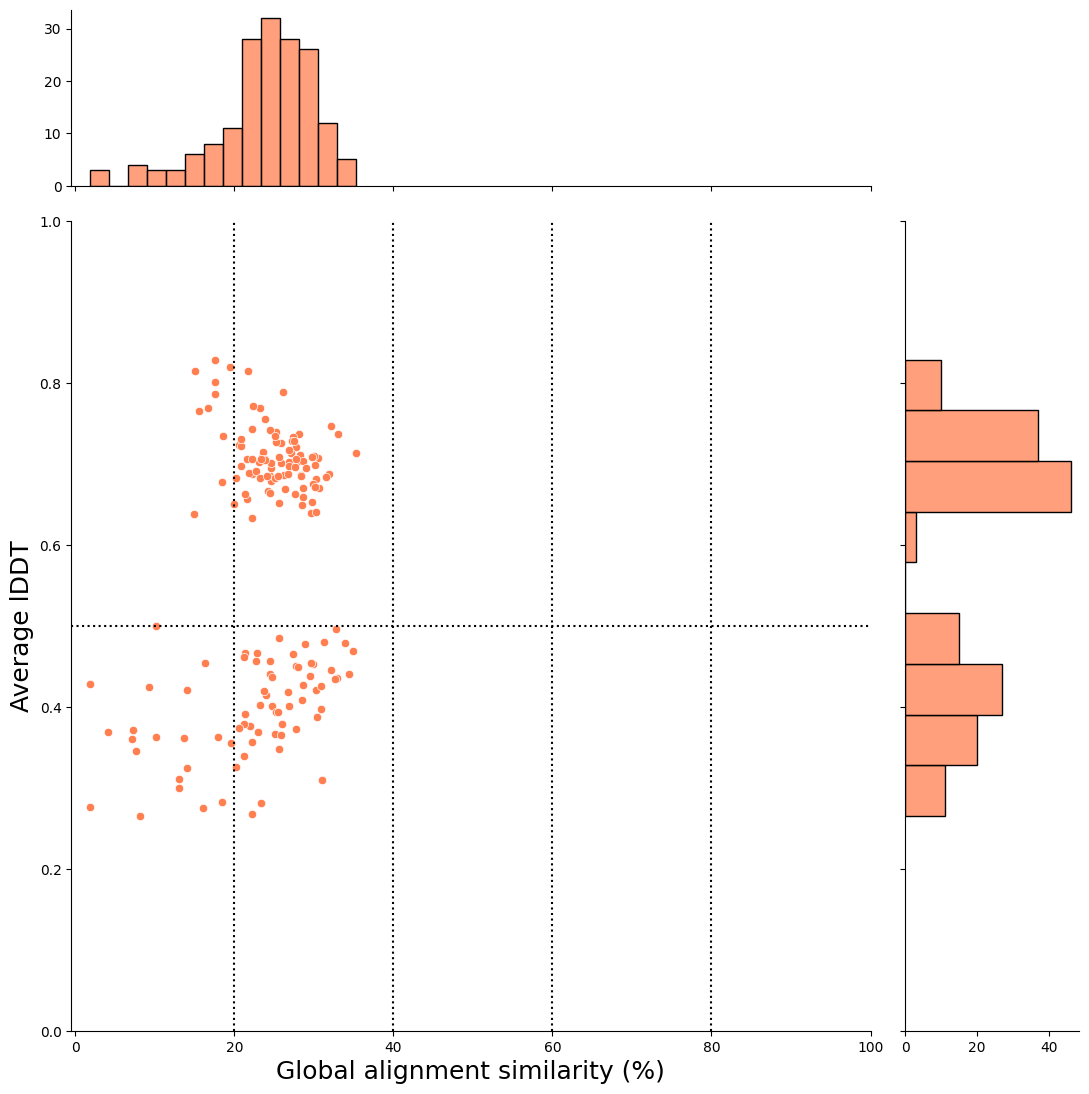

In [29]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

<Figure size 4000x4000 with 0 Axes>

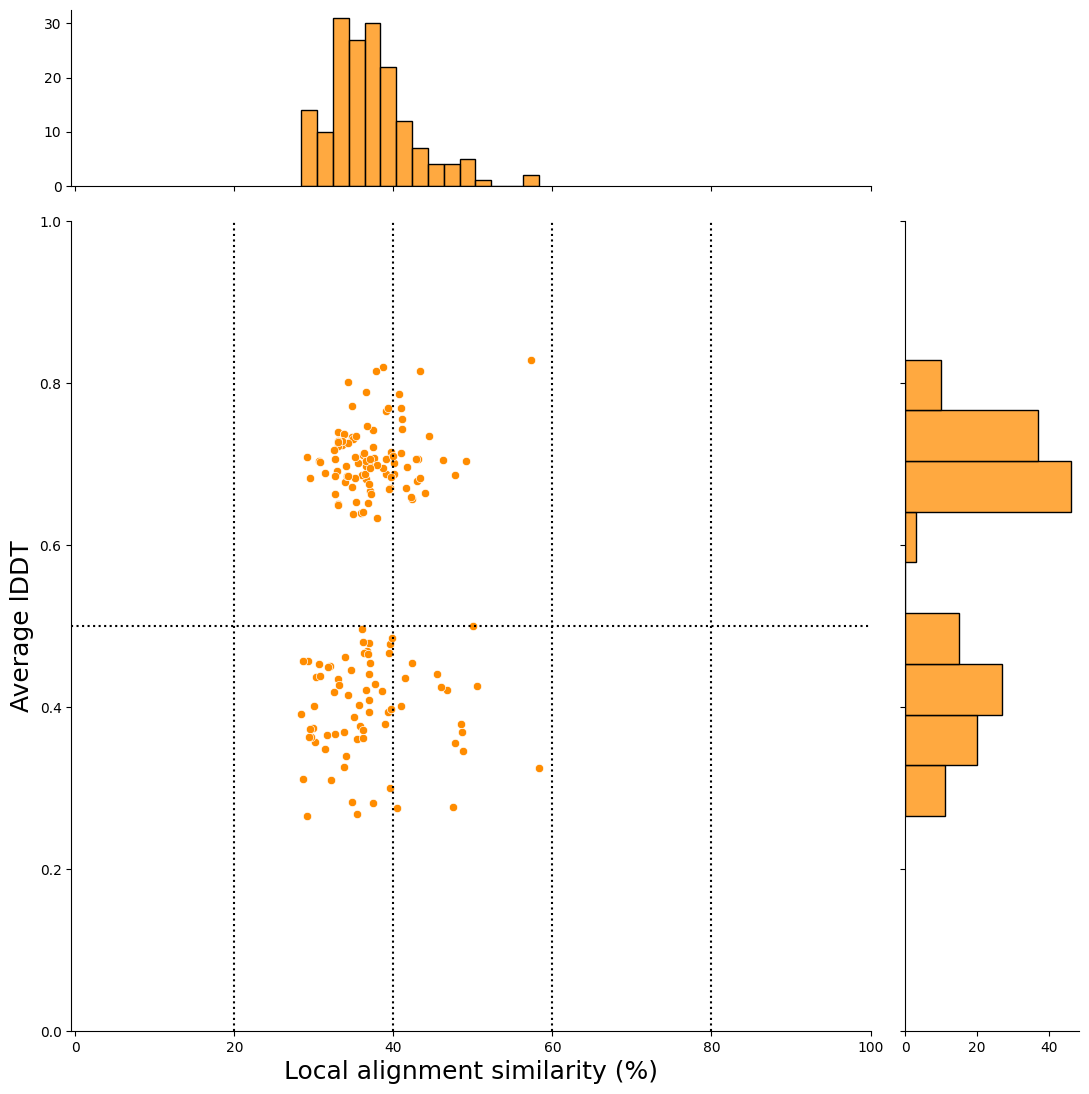

In [30]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_water",
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")

plt.axhline(y=0.5, color="black", linestyle=":")
plt.show()

&nbsp;

&nbsp;
